
# Project: Investigate TMDb movie data-Part 2

## Table of Contents
<ul>
<li><a href="#intro"> I) Introduction</a></li>
<li><a href="#wrangling"> II) Data Wrangling</a></li>
<li><a href="#eda"> III) Exploratory Data Analysis & Relevant Conlusions</a></li>
</ul>

# <a id='intro'></a>
## I) Introduction

> This is the part -2 of the report analyzing the TMDB 500 movies dataset. In this part, the questions related to budget, rating and time of release will be analyzed, and summary conclusions will follow with the observations after each question. 



           
           
### 3. Budget: 
          
**A) What are the 10 most expensive movies?**
**B) In the dataset, which variables are highly correlated to each other?**


### 4. Rating: 
**A) What is the proportion of low, medium and high average rating movies?**


   
### 5. Times of release 
**A) Considering all the years, which month of the year has the highest percentage of movies released?**
**B) Considering all the years, which quarter of the year has the highest percentage of movies released?**
**C) Which single month of a particular decade has the highest amount of movie realised?**
           
           
           
           

<a id='wrangling'></a>
## II) Data Wrangling



In [1]:
# Importing packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

%matplotlib inline

# reading the CSV file
df_movies = pd.read_csv('C:\\Users\\raz37388\\Desktop\\Udacity_assignment\\Assignment 2\\tmdb-movies.csv') 


### Data properties

In [2]:
# view dimensions of dataset
df_movies.shape

(10866, 21)

### Drop Extraneous Columns:: For answering the questions on budget, rating and time of release , we do not need all the colums. 


In [3]:
# check column names
df_movies.head(3)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   
2  262500  tt2908446   13.112507  110000000   295238201           Insurgent   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   

                                         homepage          director  \
0                   http://www.jurassicworld.com/   Colin Trevorrow   
1                     http://www.madmaxmovie.com/     George Miller   
2  http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   

                      tagline      ...       \
0           The park is open.      ...        
1          What a Lovely Day.      ...        
2  One Choice Can Destroy You      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...     6/9/2015       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...    5/13/2015       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...    3/18/2015       2480   

   vote_average  release_year   budget_adj   revenue_adj  
0           6.5          2015  137999939.3  1.392446e+09  
1           7.1          2015  137999939.3  3.481613e+08  
2           6.3          2015  101199955.5  2.716190e+08  

[3 rows x 21 columns]

In [4]:
# drop columns from the dataset that will not be used during the analysis
df_movies.drop(['id', 'imdb_id', 'popularity', 'homepage', 'cast', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies', 'vote_count',  'budget_adj', 'revenue_adj'], axis = 1, inplace= True)

In [5]:
# confirm changes- the dropped columns will not appear
df_movies.head(1)

budget     revenue  original_title  runtime release_date  vote_average  \
0  150000000  1513528810  Jurassic World      124     6/9/2015           6.5   

   release_year  
0          2015

In [6]:
# confirm changes- should return the remaining columns
df_movies.shape

(10866, 7)

In [7]:
# view missing value count for each feature of the dataset
df_movies.isnull().sum()

budget            0
revenue           0
original_title    0
runtime           0
release_date      0
vote_average      0
release_year      0
dtype: int64

In [8]:
# checks if any of columns have null values - should print False
df_movies.isnull().sum().any()

False

In [9]:
# find duplicate 
df_movies[df_movies.duplicated()]

budget  revenue original_title  runtime release_date  vote_average  \
2090  30000000   967000         TEKKEN       92    3/20/2010           5.0   

      release_year  
2090          2010

In [10]:
#dropping the duplicate 
df_movies.drop_duplicates(inplace=True)

In [11]:
# CHecking for the duplicate- should return False 
df_movies.duplicated().any()

False

In [12]:
# See the summary of the data 
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 7 columns):
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
runtime           10865 non-null int64
release_date      10865 non-null object
vote_average      10865 non-null float64
release_year      10865 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 679.1+ KB


In [13]:
# Converting the budget and revenue in million USD
df_movies['budget']= df_movies['budget']/10**6
df_movies['revenue']= df_movies['revenue']/10**6

In [14]:
#Calcuating profit by subtructing budget from revenue
df_movies['profit'] = df_movies['revenue']-df_movies['budget']

In [15]:
# Creates bin edges for each decade
bin_edges = [1959, 1969, 1979, 1989, 1999, 2009, 2019 ]

In [16]:
# Creates bin names based on the decades
bin_names = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s' ]

In [17]:
# Creates decade_levels column based on the year of release
df_movies['decade'] = pd.cut(df_movies['release_year'], bin_edges, labels = bin_names)

In [18]:
df_movies['decade'].value_counts().sum()

10865

In [19]:
#Check if the decade level has appeared 
df_movies.head(3)

budget      revenue      original_title  runtime release_date  \
0   150.0  1513.528810      Jurassic World      124     6/9/2015   
1   150.0   378.436354  Mad Max: Fury Road      120    5/13/2015   
2   110.0   295.238201           Insurgent      119    3/18/2015   

   vote_average  release_year       profit decade  
0           6.5          2015  1363.528810  2010s  
1           7.1          2015   228.436354  2010s  
2           6.3          2015   185.238201  2010s

### III) Exploratory Data Analysis & Relevant Conlusions

### 3-A ) List 10 Most  Expensive movies

In [20]:
# 10 movies with the largest budget
df_top10_budget = df_movies.nlargest(10,'budget')

In [21]:
# sorting the release_year and restting the index
df_top10_budget = df_top10_budget.sort_values('release_year').reset_index()

In [22]:
# Movies release in September in all the years of 2010s

df_top10_budget[['release_year','original_title','budget', 'decade']]

release_year                               original_title  budget decade
0          2006                             Superman Returns   270.0  2000s
1          2007     Pirates of the Caribbean: At World's End   300.0  2000s
2          2007                                 Spider-Man 3   258.0  2000s
3          2010                            The Warrior's Way   425.0  2010s
4          2010                                      Tangled   260.0  2010s
5          2011  Pirates of the Caribbean: On Stranger Tides   380.0  2010s
6          2012                                  John Carter   260.0  2010s
7          2013                              The Lone Ranger   255.0  2010s
8          2014    The Hobbit: The Battle of the Five Armies   250.0  2010s
9          2015                      Avengers: Age of Ultron   280.0  2010s

In [23]:
df_movies.nlargest(1,'budget')

budget    revenue     original_title  runtime release_date  \
2244   425.0  11.087569  The Warrior's Way      100    12/2/2010   

      vote_average  release_year      profit decade  
2244           6.4          2010 -413.912431  2010s

## 3-A) Conclusion

**The 10 movies with the largest budget have been made between 2006-2015. It is important to note that, this calculation of budget does not include inflation and for a more accurate account, inflation needs to be adjusted.**

### 3-B ) In the dataset, which variables are highly correlated to each other?

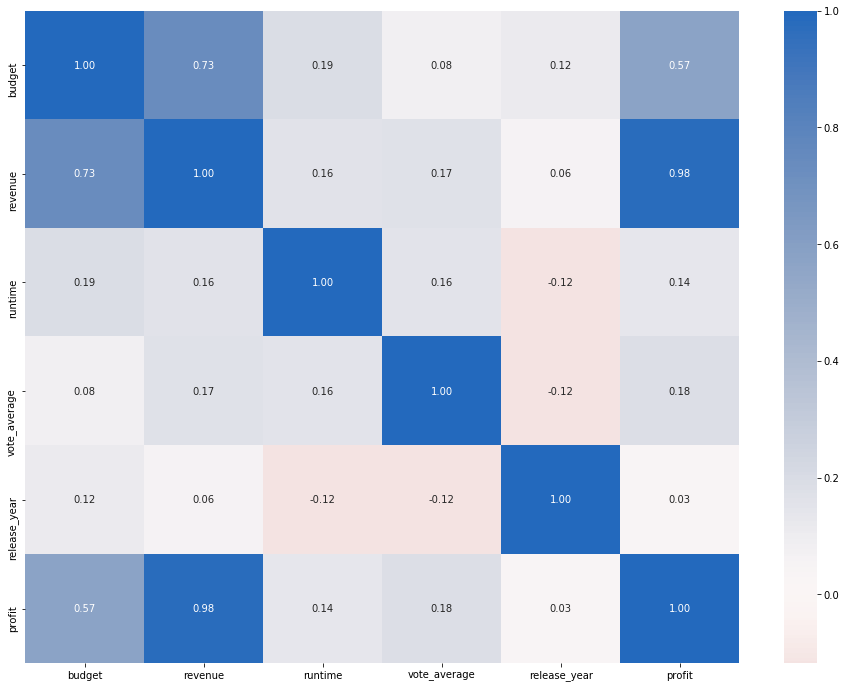

In [24]:
## Correlatin Matrix between various variables 
plt.figure(figsize = [16, 12])
sns.heatmap(df_movies.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

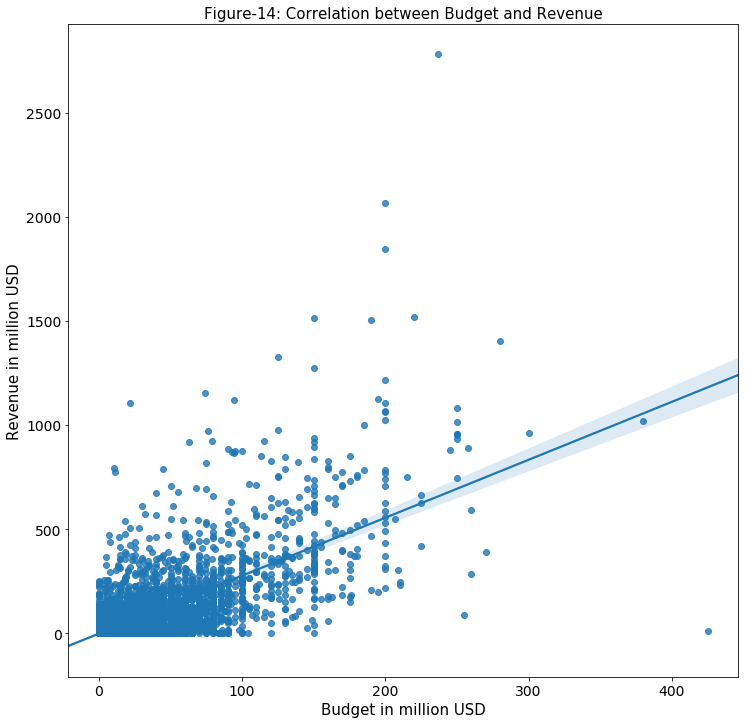

In [25]:
#Plot of the Correlation between budget and revenue
plt.figure(figsize = [12, 12])
sns.regplot(data = df_movies, x = 'budget', y = 'revenue')
plt.title('Figure-14: Correlation between Budget and Revenue',fontsize=15)
plt.xlabel("Budget in million USD", fontsize=15)
plt.ylabel("Revenue in million USD",fontsize=15)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

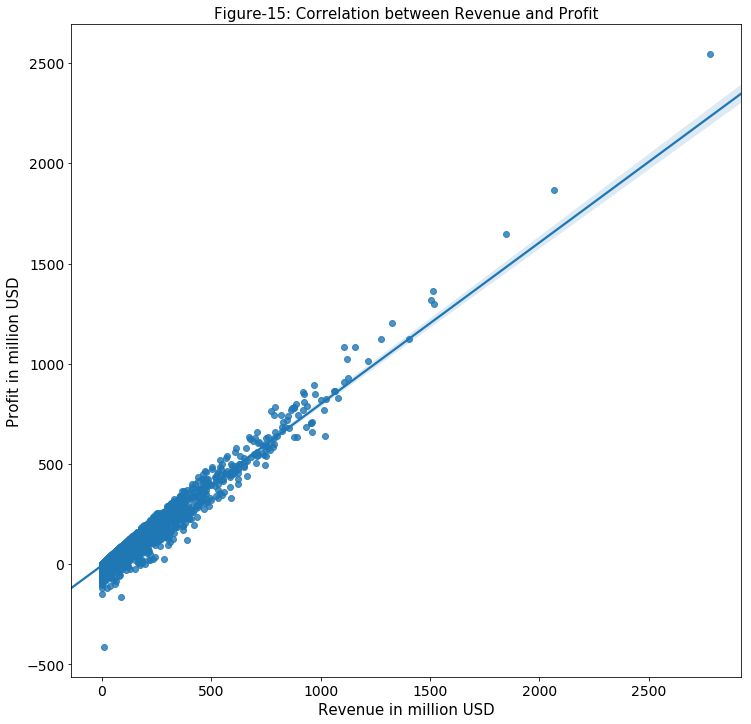

In [26]:
#Plot of the Correlation between revenue and profit
plt.figure(figsize = [12, 12])
sns.regplot(data = df_movies, x = 'revenue', y = 'profit')
plt.title('Figure-15: Correlation between Revenue and Profit',fontsize=15)
plt.xlabel("Revenue in million USD",fontsize=15)
plt.ylabel("Profit in million USD",fontsize=15)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

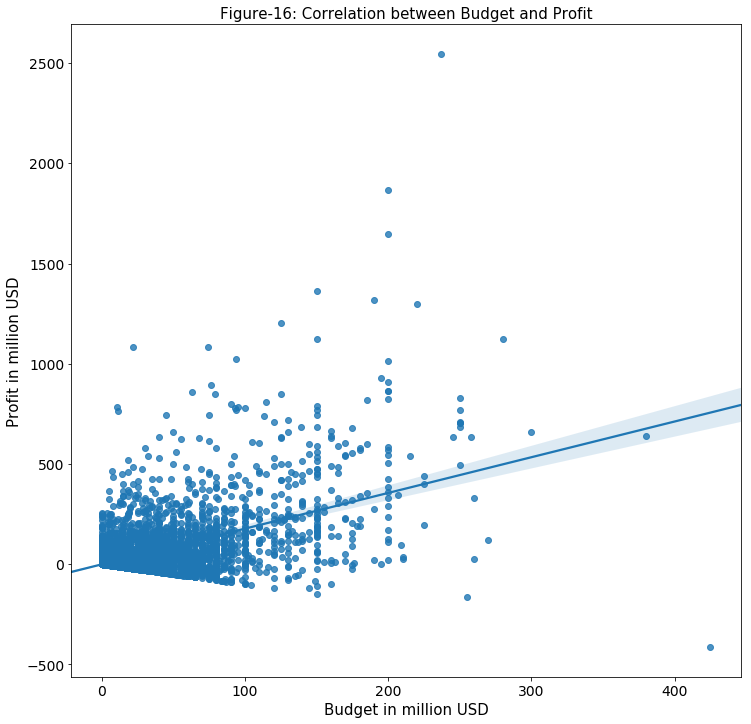

In [27]:
plt.figure(figsize = [12, 12])
sns.regplot(data = df_movies, x='budget',y='profit')
plt.title("Figure-16: Correlation between Budget and Profit",fontsize=15)
plt.xlabel("Budget in million USD",fontsize=15)
plt.ylabel("Profit in million USD",fontsize=15)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

### 3-B Conclusion:

**From the correlation matrix, a strong correlation can be observed between-**

**1) Budget and Revenue**
****2) Revenue and Profit**
**3) Budget and Profit**

**From the value of the correlation coefficient, it can be seen that the revenue and profit have the strongest relationship which is logical- because higher the revenue highest the profit becomes.**


### 4-A) What is the proportion low, medium and high average rating movies?



In [28]:
# Summary of the data to see the percentiles, the highest and the lowest values of average_rating
df_movies.describe().vote_average

count    10865.000000
mean         5.975012
std          0.935138
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

### Note: To answer this question, let we create some  categories based on vote_average:

**1. Vote_average 1.5-6 : Low rated**
    
**2. Vote_average 6.1-7.5 : Medium rated** 
    
**3. Vote_average 7.6-9.2 : High rated** 

In [29]:
# Creates bin edges for runtime
bin_edges = [1.4, 6, 7.5, 9.2]

# Creates bin names based on the runtime
bin_names = ['Low rated', 'Medium rated', 'High rated']

# Creates decade_levels column based on the year of release
df_movies['rating_category'] = pd.cut(df_movies['vote_average'], bin_edges, labels = bin_names)


In [30]:
# See the rating _category
df_movies.head()

budget      revenue                original_title  runtime release_date  \
0   150.0  1513.528810                Jurassic World      124     6/9/2015   
1   150.0   378.436354            Mad Max: Fury Road      120    5/13/2015   
2   110.0   295.238201                     Insurgent      119    3/18/2015   
3   200.0  2068.178225  Star Wars: The Force Awakens      136   12/15/2015   
4   190.0  1506.249360                     Furious 7      137     4/1/2015   

   vote_average  release_year       profit decade rating_category  
0           6.5          2015  1363.528810  2010s    Medium rated  
1           7.1          2015   228.436354  2010s    Medium rated  
2           6.3          2015   185.238201  2010s    Medium rated  
3           7.5          2015  1868.178225  2010s    Medium rated  
4           7.3          2015  1316.249360  2010s    Medium rated

In [31]:
# Counting the number of movies in each rating category
df_movies['rating_category'].value_counts()

Low rated       5550
Medium rated    4965
High rated       350
Name: rating_category, dtype: int64

In [32]:
# percentage of movies in each rating category
df_movies['rating_category'].value_counts()/df_movies['rating_category'].value_counts().sum()*100

Low rated       51.081454
Medium rated    45.697193
High rated       3.221353
Name: rating_category, dtype: float64

In [33]:
#Finding the index values
voting_average_order = df_movies['rating_category'].value_counts().index

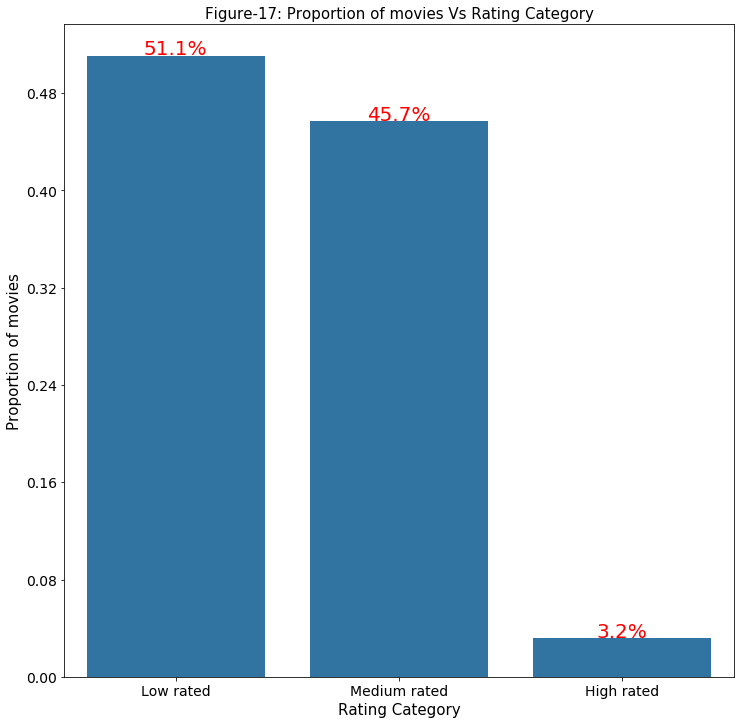

In [34]:
# plotting the percentage of movies in each rating category
plt.figure(figsize = [12, 12])
n_points =  df_movies['rating_category'].value_counts().sum()
max_count = df_movies['rating_category'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.08)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_movies, x = 'rating_category', color = base_color)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('Proportion of movies',fontsize=15)
plt.xlabel('Rating Category',fontsize=15)
plt.title('Figure-17: Proportion of movies Vs Rating Category',fontsize=15)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

# add annotations
cat_counts = df_movies['rating_category'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+7, pct_string, ha = 'center', color = 'R',fontsize=20)
    

### 4-A Conclusion

**From Figure-17 it can be seen that-**

**1) 51.1 % of the movies have a rating of 1.5-6 and falls into the Low rated category, and hence this is the category that dominates.** 

**2) 45.7 % of the movies have a rating of 6-7.5 and falls into the Medium rated category.****

**3) Only 3.2 % of the movies have a rating of 7.5-9.2 and falls into the high rated category which is the smallest category.**

### 5. Time of Relase:

### 5-A) Considering all the years, which month of the year has the highest percentage of movies released ? 

In [35]:
# See the release_date datatype
df_movies['release_date'].head(2)

0     6/9/2015
1    5/13/2015
Name: release_date, dtype: object

### Note: 

**From the datatype, we can see 'release_date' is a string object. In order to analyze the month and quarter of the year, we need to convert the date from the string into DateTime format.**

In [36]:
#Converting release_date into datetime format
df_movies['release_date']= pd.to_datetime(df_movies.release_date)

In [37]:
#Checking the release_date conversion into datetime format
df_movies['release_date'].head(2)

0   2015-06-09
1   2015-05-13
Name: release_date, dtype: datetime64[ns]

In [38]:
#Extracting the Month from the release_date 
df_movies['Month'] = df_movies['release_date'].dt.month

In [39]:
# Creating the Month-name category 
df_movies['Month-str'] = df_movies['release_date'].dt.strftime('%b')

In [40]:
# Observe the Month information
df_movies.head(2)

budget      revenue      original_title  runtime release_date  \
0   150.0  1513.528810      Jurassic World      124   2015-06-09   
1   150.0   378.436354  Mad Max: Fury Road      120   2015-05-13   

   vote_average  release_year       profit decade rating_category  Month  \
0           6.5          2015  1363.528810  2010s    Medium rated      6   
1           7.1          2015   228.436354  2010s    Medium rated      5   

  Month-str  
0       Jun  
1       May

In [41]:
# Calculating the number of movie release per month
df_movies_per_month = df_movies['Month-str'].value_counts()

In [42]:
# Number of movies 
df_movies_per_month

Sep    1331
Oct    1153
Dec     985
Jan     919
Aug     918
Jun     827
Mar     822
Nov     814
May     809
Jul     799
Apr     797
Feb     691
Name: Month-str, dtype: int64

### Note: It can be seen that the month of September has the largest amount of movies released combining all the years.

In [43]:
# Counting the total- should return 10865 as there is no null values
df_movies_per_month.sum()

10865

In [44]:
# Creating the Month-name category 
df_movies['Month-str'] = df_movies['release_date'].dt.strftime('%b')

In [45]:
# Observe the Month-name category 
df_movies.head()

budget      revenue                original_title  runtime release_date  \
0   150.0  1513.528810                Jurassic World      124   2015-06-09   
1   150.0   378.436354            Mad Max: Fury Road      120   2015-05-13   
2   110.0   295.238201                     Insurgent      119   2015-03-18   
3   200.0  2068.178225  Star Wars: The Force Awakens      136   2015-12-15   
4   190.0  1506.249360                     Furious 7      137   2015-04-01   

   vote_average  release_year       profit decade rating_category  Month  \
0           6.5          2015  1363.528810  2010s    Medium rated      6   
1           7.1          2015   228.436354  2010s    Medium rated      5   
2           6.3          2015   185.238201  2010s    Medium rated      3   
3           7.5          2015  1868.178225  2010s    Medium rated     12   
4           7.3          2015  1316.249360  2010s    Medium rated      4   

  Month-str  
0       Jun  
1       May  
2       Mar  
3       Dec  
4       Apr

In [46]:
#Counting the number of movies per month
df_month_count = df_movies['Month-str'].value_counts()

In [47]:
# percentage of movie per month
df_month_count/ df_month_count.sum()*100

Sep    12.250345
Oct    10.612057
Dec     9.065808
Jan     8.458353
Aug     8.449149
Jun     7.611597
Mar     7.565578
Nov     7.491947
May     7.445927
Jul     7.353889
Apr     7.335481
Feb     6.359871
Name: Month-str, dtype: float64

### Conclusion 5-A 

**The month of September has the highest percentage of movies released and that is 12.25%, and the month of February has the lowest percentage of movies released which is 6.35%.**
    
    

### 5-B) Considering all the years, which quarter of the year has the highest percentage of movies released ? 

### Note: To answer this question the whole year is divided in 04 quarters:

**1) Jan- Mar: First Quarter**

**2) Apr- June: Second Quarter**

**3) July- Sep: Third Quarter**

**4) Oct- Dec: Fourth Quarter**

In [48]:
# Creates bin edges for claculating quarter of the year
bin_edges = [0, 3, 6, 9, 12]

In [49]:
# Creates bin names based on the runtime
bin_names = ['First', 'Second', 'Third', 'Fourth' ]

In [50]:
# Creates decade_levels column based on the year of release
df_movies['quarter'] = pd.cut(df_movies['Month'], bin_edges, labels = bin_names)

In [51]:
df_movies.head(2)

budget      revenue      original_title  runtime release_date  \
0   150.0  1513.528810      Jurassic World      124   2015-06-09   
1   150.0   378.436354  Mad Max: Fury Road      120   2015-05-13   

   vote_average  release_year       profit decade rating_category  Month  \
0           6.5          2015  1363.528810  2010s    Medium rated      6   
1           7.1          2015   228.436354  2010s    Medium rated      5   

  Month-str quarter  
0       Jun  Second  
1       May  Second

In [52]:
#Count the number of movies per quarter
df_movies_perquarter = df_movies.quarter.value_counts()

In [53]:
#Count the number of movies per quarter- should return 10865
df_movies_perquarter.sum()

10865

In [54]:
# Calculating the percentage of movies per quarter
df_quarter_percentage =  df_movies_perquarter/ df_movies_perquarter.sum()*100

In [55]:
# Calculating the percentage of movies per quarter
df_quarter_percentage

Third     28.053382
Fourth    27.169811
Second    22.393005
First     22.383801
Name: quarter, dtype: float64

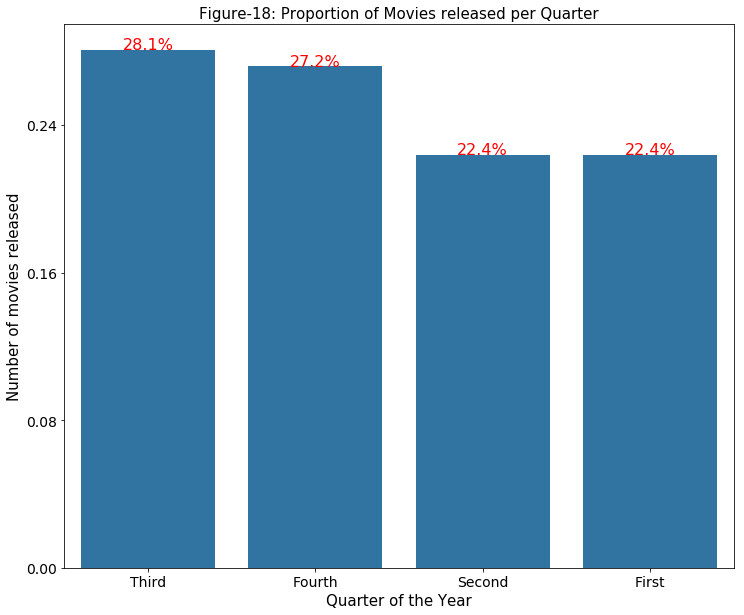

In [56]:
#sns.barplot(df_quarter_percentage.index, df_quarter_percentage, color=base_color, order= df_quarter_percentage.index)

plt.figure(figsize = [12, 10])
n_points =  df_movies.quarter.value_counts().sum()
max_count = df_movies.quarter.value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.08)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_movies, x = 'quarter', color = base_color, order= df_quarter_percentage.index )
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("Quarter of the Year", fontsize=15)
plt.ylabel("Number of movies released",fontsize=15)
plt.title('Figure-18: Proportion of Movies released per Quarter',fontsize=15)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

# add annotations
cat_counts = df_movies['quarter'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+5, pct_string, ha = 'center', color = 'R',fontsize=16)
    

### Conclusion: 5-B: 

**From the Figure-18 it can be obserbed that-**

**1) The third quarter of the year ( from July-September) has the largest amount of movies released closely followed by the Fourth Quarter ( from October-December).**

**2) The first and second quarter has (almost) an equal amount of movies released.**

**3) It can be concluded that most of the producers choose the second half of the year (July-Dec) to release their movies.**

### 5-C) Which single month of a particular decade has the highest amount of movie realsed?

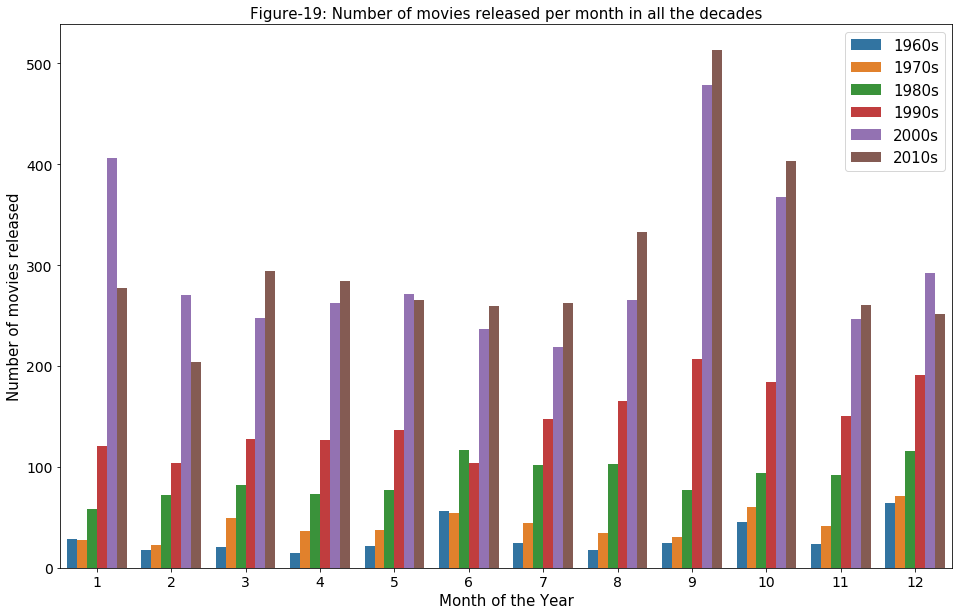

In [57]:
#Highest Number of movie released in a month
plt.figure(figsize = [16, 10])
sns.countplot(data = df_movies, x = 'Month', hue = 'decade')
plt.xlabel("Month of the Year",fontsize=15)
plt.ylabel("Number of movies released",fontsize=15)
plt.title("Figure-19: Number of movies released per month in all the decades",fontsize=15)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.legend(loc=1,prop={'size':15})

In [58]:
# Number of moovies in each month 
df_movies['Month-str'].value_counts()

Sep    1331
Oct    1153
Dec     985
Jan     919
Aug     918
Jun     827
Mar     822
Nov     814
May     809
Jul     799
Apr     797
Feb     691
Name: Month-str, dtype: int64

In [59]:
#Total number of movies released in the month of September during the 2010s
df_total_Sep_2010s = df_movies.query('Month == 9').query('decade == "2010s"').count().original_title
print(df_total_Sep_2010s)

513


In [60]:
# Total number of movies released in the month of September during the 2000s
df_total_Sep_2000s =df_movies.query('Month == 9').query('decade == "2000s"').count().original_title
print(df_total_Sep_2000s)

478


In [61]:
#Total number of movies released in the month of September during the 2010s
df_2010s_release = df_movies.query('Month == 9').query('decade == "2010s"').groupby(['release_year'], as_index= False).count()

In [62]:
# Movies release in September in all the years of 2010s
df_2010s_Sep = df_2010s_release.nlargest(6,'original_title')
print(df_2010s_Sep[['release_year','original_title']])

   release_year  original_title
4          2014              98
2          2012              97
1          2011              95
3          2013              86
5          2015              74
0          2010              63


In [63]:
#Total number of movies released in the month of September during the 2000s
df_2000s_release = df_movies.query('Month == 9').query('decade == "2000s"').groupby(['release_year'], as_index= False).count()

In [64]:
# Movies release in September in all the years of 2010s
df_2000s_Sep = df_2000s_release.reset_index().nlargest(10,'original_title')
print(df_2000s_Sep[['release_year','original_title']])

   release_year  original_title
9          2009              74
7          2007              71
5          2005              68
6          2006              66
8          2008              60
4          2004              38
3          2003              35
2          2002              24
0          2000              23
1          2001              19


### Conclusion: 5-D


**From Figure-19, it can be observed that the largest number of movies were made during 2010s September.After further investigation, it has been found that during the September 2014, the highest amount of movies were released which is 98 followed by a total of 97 movies in the year 2012.**